# **Week 4: Deployment on Flask**

**1-Building Model and Save**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
house_data=pd.read_csv('USA_Housing.csv')

**1.1-Investigation of datasets**

In [5]:
house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
house_data.rename(columns = {'Avg. Area Income':'Area_Income'}, inplace = True)
house_data.rename(columns = {'Avg. Area House Age':'Area_House_Age'}, inplace = True)
house_data.rename(columns = {'Avg. Area Number of Rooms':'Area_Number_Rooms'}, inplace = True)
house_data.rename(columns = {'Avg. Area Number of Bedrooms':'Area_Number_Bedrooms'}, inplace = True)
house_data.rename(columns = {'Area Population':'Area_Populations'}, inplace = True)

In [7]:
house_data.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Populations,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area_Income           5000 non-null   float64
 1   Area_House_Age        5000 non-null   float64
 2   Area_Number_Rooms     5000 non-null   float64
 3   Area_Number_Bedrooms  5000 non-null   float64
 4   Area_Populations      5000 non-null   float64
 5   Price                 5000 non-null   float64
 6   Address               5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
house_data.isnull().sum()

Area_Income             0
Area_House_Age          0
Area_Number_Rooms       0
Area_Number_Bedrooms    0
Area_Populations        0
Price                   0
Address                 0
dtype: int64

In [10]:
house_data=house_data.drop(['Address'], axis=1)
house_data.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Populations,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [11]:
house_data.shape

(5000, 6)

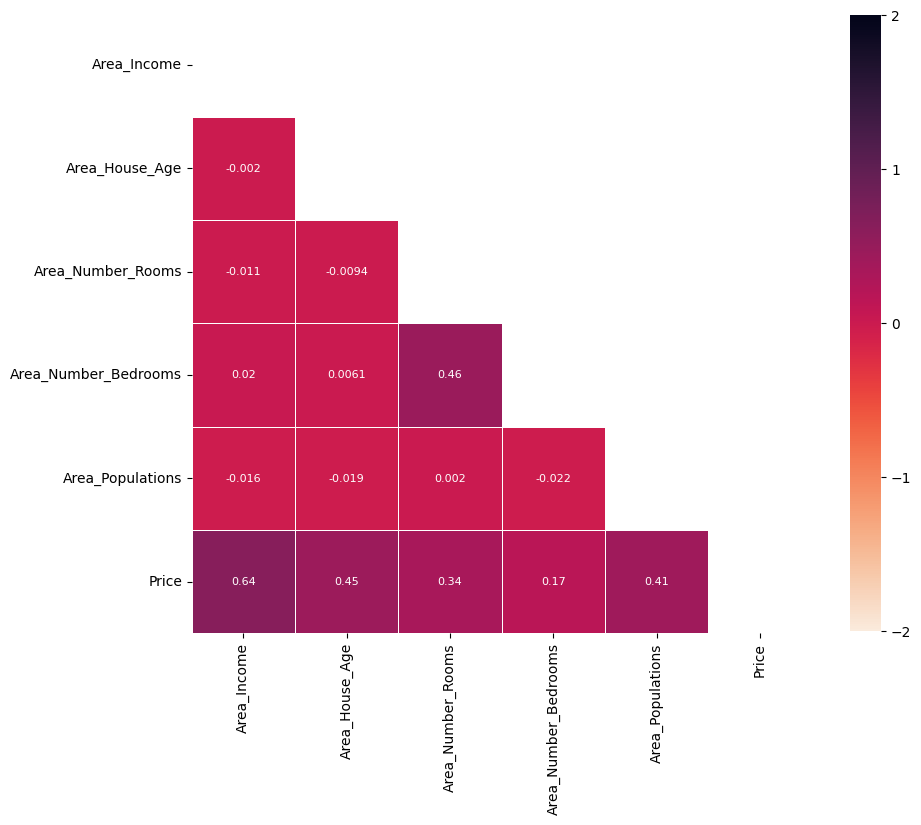

In [12]:
# Plotting heatmap 
corr=house_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr, mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "rocket_r",
                      cbar_kws = {'shrink': .8, 
                                "ticks" : [-2, -1, 0, 1, 2]},
                      vmin = -2, 
                      vmax = 2,
                      annot = True,
                      annot_kws = {"size":8})
# Add the column names as labels
ax.set_yticklabels(corr.columns)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

**1.2-Build Model**

In [13]:
from sklearn.model_selection import train_test_split
#Split data into train and test sets
x = house_data.drop(['Price'],axis=1)
y = house_data['Price']
 
X_train, X_test, y_train, y_test = train_test_split(
    x, y, train_size=0.70,test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape)

(3500, 5) (1500, 5)


In [14]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

model_RFR=RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_RFR.fit(X_train,y_train)
y_pred=model_RFR.predict(X_test)

print('R2 Value:',metrics.r2_score(y_test, model_RFR.predict(X_test)))
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred ) / y_test)) * 100))
pd.Series(model_RFR.feature_importances_, index=x.columns).sort_values(ascending=False)

R2 Value: 0.888424780124613
Accuracy 90.40888727311193


Area_Income             0.428232
Area_House_Age          0.237280
Area_Populations        0.188185
Area_Number_Rooms       0.128525
Area_Number_Bedrooms    0.017778
dtype: float64

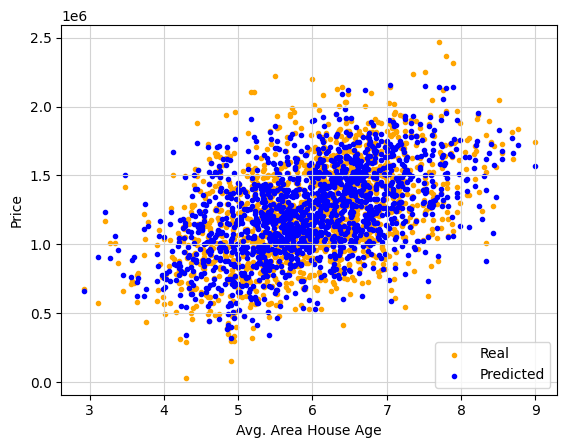

In [15]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.Area_House_Age

# Build scatterplot
plt.scatter(x_axis, y_test, color = 'orange', marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, color = 'blue',marker = '.',label = 'Predicted')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.grid(color ='#D3D3D3')
plt.legend(loc ='lower right')
plt.show()

In [16]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared scores
r2 = r2_score(y_test.values,y_pred)
# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 95982.06
Mean Squared Error: 14431051360.91
R-squared scores: 0.89


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

pd.Series(model.coef_, index=x.columns).sort_values(ascending=False)

Model Coefficients: [2.16187374e+01 1.66145180e+05 1.21010577e+05 1.76003780e+03
 1.51647974e+01]
Mean Absolute Error: 81563.14733994487
Coefficient of Determination: 0.9200757649412041


Area_House_Age          166145.179949
Area_Number_Rooms       121010.576873
Area_Number_Bedrooms      1760.037796
Area_Income                 21.618737
Area_Populations            15.164797
dtype: float64

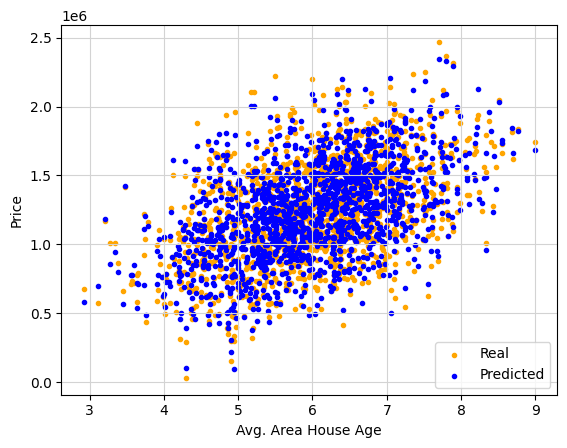

In [18]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.Area_House_Age

# Build scatterplot
plt.scatter(x_axis, y_test, color = 'orange', marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, color = 'blue',marker = '.',label = 'Predicted')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.grid(color ='#D3D3D3')
plt.legend(loc ='lower right')
plt.show()

In [19]:
# Make prediction
import warnings
warnings.filterwarnings('ignore')

predict = model.predict(X_test)
result = X_test
result['Price'] = y_test
result['Predic_Price'] = predict.tolist()
result.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Populations,Price,Predic_Price
398,61200.726175,5.299694,6.234615,4.23,42789.692217,894251.068636,969608.346806
3833,63380.814670,5.344664,6.001574,2.45,40217.333577,932979.360621,953868.155486
4836,71208.269301,5.300326,6.077989,4.01,25696.361741,920747.911288,907506.328361
4572,50343.763518,6.027468,5.160240,4.35,27445.876739,691854.921027,493325.260323
636,54535.453719,5.278065,6.871038,4.41,30852.207006,732733.236293,718221.210115


**1.3- Save Model**

In [20]:
import pickle

In [21]:
#Save model
pickle.dump(model, open('model.pkl', 'wb'))

# **2-Deploying The Model on Flask (Web App)**

In [22]:
!pip install flask --quiet
!pip install flask-ngrok --quiet

In [23]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

--2023-05-28 16:55:13--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13856790 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.21M  12.8MB/s    in 1.0s    

2023-05-28 16:55:15 (12.8 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13856790/13856790]



In [24]:
!tar -xvf /content/ngrok-stable-linux-amd64.tgz

ngrok


In [25]:
!./ngrok authtoken 23H0IY10fqeKMIW7kG05JhKZMae_3Zabr2iqkU9AUcZ7CrRTP

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [29]:
# import Flask from flask module
from flask import Flask

# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template  
app = Flask(__name__) #app name
run_with_ngrok(app)
  
model = pickle.load(open('model.pkl','rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/', methods = ['POST'])
def predict():
    int_features = [int(x) for x in request.form.values()]
    features = [np.array(int_features)]
    prediction = model.predict(features)
    
    output = round(prediction[0], 2)
    
    if output < 0:
        return render_template('index.html', prediction_text = " Values entered not reasonable")
    elif output >= 0:
        return render_template('index.html', prediction_text = 'Predicted Price of the house is: ${}'.format(output))   

#Run app
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://4af9-34-32-197-14.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [28/May/2023 16:56:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2023 16:56:49] "GET /favicon.ico HTTP/1.1" 404 -


In [27]:
!mkdir templates -p

In [28]:
#css code
%%writefile templates/index.html

<html>

<head>
    <meta charset="UTF-8">
    <style>
        /*This section involves the overall style of main tags*/

        * {
            font-family: Lucida Handwriting;
        }

        body {
            background-color: rgb(179, 94, 167);
            background-size: cover;
        }

        form {
            text-align: center;
        }

        h1 {
            color: white;
            text-align: center;
            font-family: Lucida Handwriting;
            font-size: 500%;
        }

        button {
            font-weight: bold;
            background-color: rgb(179, 94, 167);
            padding: 8px 16px;
            display: inline-block;
            text-decoration: none;
            border-radius: 3px;
            color: black;
            border-color: black;
            font-family: Monaco;
            border-style: solid;
        }

        input {
            padding: 12px 20px;
            margin: 8px 0;
            box-sizing: border-box
        }

        label {
            color: white;
        }

        /*Margin, layout and design of paragraphs and structures*/

        .para {
            text-align: center;
        }

        .result {
            font-weight: bold;
            background-color: rgb(179, 94, 167);
            padding: 8px 16px;
            display: inline-block;
            text-decoration: none;
            border-radius: 3px;
            color: black;
            border-color: black;
            font-family: Monaco;
            border-style: solid;
        }

        .pred {
            text-align: center;
        }

        .intro {
            font-size: 20px;
        }


        /*Layout and structure of form body in page*/

        div.container {
            background-color: rgba(0, 0, 0, 0.5);
            font-size: 18px;
            margin: 1%;
            width: 500px;
            border: 2px solid rgba(255, 255, 255, 0.3);
            padding: 7px;
            border-radius: 50px 20px;
            box-shadow: 2px 2px 15px
        }

        div.page {
            width: 500px;
            margin: 100px auto 0px auto;
        }

        form.info {
            margin: 15px;
        }

        /*This section involves the design of the inputs in the form*/

        input#name {
            width: 300px;
            border: 1px solid #ddd;
            border-radius: 3px;
            outline: 0;
            padding: 7px;
            color: black;
            box-shadow: insert 1px 1px 5px rgba(0, 0, 0, 0.3);
        }

        input#age {
            width: 300px;
            border: 1px solid #ddd;
            border-radius: 3px;
            outline: 0;
            padding: 7px;
            background-color: #fff;
            box-shadow: insert 1px 1px 5px rgba(0, 0, 0, 0.3);
        }

        input#rooms {
            width: 300px;
            border: 1px solid #ddd;
            border-radius: 3px;
            outline: 0;
            padding: 7px;
            background-color: #fff;
            box-shadow: insert 1px 1px 5px rgba(0, 0, 0, 0.3);
        }

        input#bedrooms {
            width: 300px;
            border: 1px solid #ddd;
            border-radius: 3px;
            outline: 0;
            padding: 7px;
            background-color: #fff;
            box-shadow: insert 1px 1px 5px rgba(0, 0, 0, 0.3);
        }

        input#population {
            width: 300px;
            border: 1px solid #ddd;
            border-radius: 3px;
            outline: 0;
            padding: 7px;
            background-color: #fff;
            box-shadow: insert 1px 1px 5px rgba(0, 0, 0, 0.3);
        }


        /*Responsible for shadow backgrounds*/

        .table {
            display: table;
            margin: 0 auto;
            margin-left: 33.85%;
        }

        ul#horizontal-list {
            min-width: 696px;
            list-style: none;
        }

        /*This section is concerned with the link layout*/

        div.title img {
            display: inline-block;
            vertical-align: middle;
        }

        div.title h1 {
            margin-left: 150px;
            display: inline-block;
            vertical-align: middle;
            padding-left: 10%;
            font-family: "Lucida Handwriting";
        }

    </style>
</head>

<body>
    <!---Initialize structure of Title and house picture--->
    <div class="title">
        <h1>House Price Predictor</h1>
        <img src="https://seeklogo.com/images/P/purple-house-logo-F4F2DD22E9-seeklogo.com.png" class="house" />
    </div>

    <!---Containerize main page for styling--->
    <div class="page">
        <!---Containerize paragraph and form for styling--->
        <div class="container">
            <br>
            <!---Initialize form structure and inputs, set method to "POST"--->
            <form action="{{url_for('predict')}}" method="post" class="info">
                <label for="name">Average Area Income</label>
                <input type="text" id="name" name="Average Income of Area" required="required" />
                <br>
                <br>
                <label for="name">Average House Age</label>
                <input type="text" id="age" name="Average House Age" required="required" /> 
                <br>
                <br>
                <label for="name">Average Number of Rooms </label>
                <input type="text" id="rooms" name="Average Number of Rooms " required="required" />
                <br>
                <br>
                <label for="name">Average Number of Bedrooms</label>
                <input type="text" id="bedrooms" name="Average Number of Bedrooms"  required="required" /> 
                <br>
                <br>
                <label for="name">Average Area Population</label>
                <input type="text" id="population" name="Average Area Population"  required="required" />
                <br>
                <br>
                <button type="submit" class="btn">Predict</button>
            </form>
            <br> 
                <!---Set placeholder for prediction output--->
                <div class ="pred">
                    <p class = "result"><b>{{ prediction_text }}</b></p>
                </div>
            </div>
        </div>
    </body>
</html>

Writing templates/index.html
